In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
T = 10
D = 1
X = []
Y= []

In [0]:
#Since it's a 3D plane, there are 8 quadrants, 4 quadrants of points will have 1 label, and the other 4 will return 0
def getLabel(x, a, b, c):
  if(x[a]<0 and x[b]<0 and x[c] <0):
    return 1
  if(x[a]<0 and x[b]>0 and x[c] >0):
    return 1
  if(x[a]>0 and x[b]<0 and x[c] >0):
    return 1
  if(x[a]>0 and x[b]>0 and x[c] <0):
    return 1
  return 0
    

In [0]:
for i in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = getLabel(x, 0, 1, 2) #long term pattern
  #y = getLabel(x, -1, -2, -3) short term pattern
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
x_train = X[:-N//2]
x_test = X[-N//2:]
y_train = Y[:-N//2]
y_test = Y[-N//2:]

In [0]:
x_train = x_train.reshape(-1, T, D)

In [0]:
x_test = x_test.reshape(-1, T, D)

In [0]:
i = tf.keras.layers.Input(shape = (T, D))
x= tf.keras.layers.LSTM(10, return_sequences=True)(i)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(i, x)


In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = 'binary_crossentropy', metrics = ["accuracy"])

In [86]:
r = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
79/79 [==============================] - 1s 13ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5064
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6862 - accuracy: 0.5560 - val_loss: 0.6857 - val_accuracy: 0.5756
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6684 - accuracy: 0.6084 - val_loss: 0.6603 - val_accuracy: 0.6268
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6331 - accuracy: 0.6724 - val_loss: 0.6089 - val_accuracy: 0.6924
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.5556 - accuracy: 0.7400 - val_loss: 0.5153 - val_accuracy: 0.7748
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.4625 - accuracy: 0.8044 - val_loss: 0.4543 - val_accuracy: 0.8144
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.3909 - accuracy: 0.8464 - val_loss: 0.3564 - val_accuracy: 0.8688
Epoch 8/100


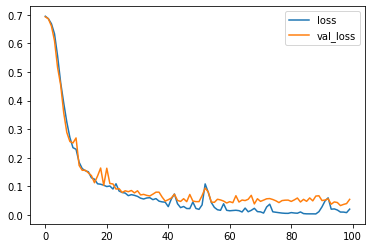

In [87]:
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

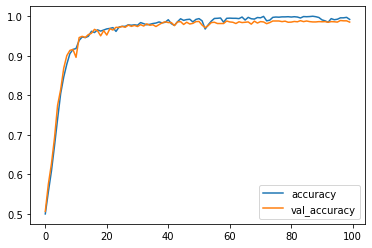

In [88]:
plt.plot(r.history['accuracy'], label = "accuracy")
plt.plot(r.history['val_accuracy'], label = "val_accuracy")
plt.legend()

In [0]:
#forecasting predictions
predictions = []
current = x_test[0]
while len(y_test) > len(predictions):
  prediction = round(model.predict(current.reshape(1,T, D))[0,0])
  predictions.append(prediction)
  current = np.roll(current, -1)
  current[-1] = prediction

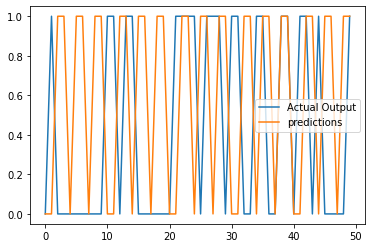

In [90]:
plt.plot(y_test[:50], label = "Actual Output")
plt.plot(predictions[:50], label = "predictions")
plt.legend()